# Applying natural language processing techniques on Wikipedia data

In this project we try to create an end-to-end NLP project leveraging textual data from wikipedia, preprocessing the text, applying NLP techniques to come up with exploratory or predictive models, storing results in databases and/or sheets, visualization of insights in Google Data Studio or equivalent dashboards and maintaining the source code and links in GitHub.

#### Main goals:

1. Wiki Crawler to extract multiple Wikipedia pages.
2. Applying embedding techniques to the extracted data.
3. Sentiment Analysis on all the pages.
4. Similarity score calculations for pages and identify similar-dissimilar pages.
5. Creating a dashboard in google studio.

The whole notebook is divided into several steps from importing libraries to doing sentimental analysis. It uses functions that are defined in other jupyter files. The links to those files have also been provided for better understanding of the work flow.

### 1. Importing Libraries And Notebooks: 

The project is divied into several notebooks, with each notebook having its own set of functions. This notebook brings all those functions from different jupyter files together to achieve the main objective. We use 'import_ipynb' library to import other jupyter notebooks.<br><br> 
Each notebook contains functions which are required for different tasks:<br>
* WikiCrawler - Contains data scrapping functions
* DataCleaner - Contains text cleaning functions
* WikiSentiAnalysis - Contains sentiment analysis functions
* WordCloudGenerator - Contains functions that display wordcloud.

In [1]:
import import_ipynb
import WikiCrawler as wk
import DataCleaner as dc
import WikiSentiAnalysis as wsa
import WordCloudGenerator as wc
import pandas as pd

importing Jupyter notebook from WikiCrawler.ipynb
importing Jupyter notebook from DataCleaner.ipynb
importing Jupyter notebook from WikiSentiAnalysis.ipynb


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


importing Jupyter notebook from WordCloudGenerator.ipynb


### 2. Scraping the data:

A random Wikipedia url is stored in the variable 'url'. Now this variable is passed to the scrape function from the WikiCrawler notebook.

In [2]:
url = "https://en.wikipedia.org/wiki/Web_scraping"

wk.scrape extracts the title and the text content of the wikipedia page and then searches for other wikipedia links in the webpage. It then picks a random link from all the wikipedia links present in the given url. This process is then looped till we get data from 100 different pages.   
<br>Link to WikiCrawler File: https://github.com/gauravshetty98/WikiCrawler/blob/main/WikiCrawler.ipynb

In [ ]:
wk.scrape(url)

### 3. Processing the text data :

Now that the data is extracted , the next step is to clean the data. The extracted data is unprocessed raw data containing stop words, punctuations, etc. These elements have to be removed from the text before performing any kind of analysis on it.

DataCleaner jupyter file has a cleaner function which is used for cleaning the raw data. cleaner() has two main jobs: 
<br>(a) To remove any special characters present in the text passed to it, except "-" and "."
<br>(b) To convert all characters into lowercase.
<br>We pass the data stored by the scrape function as the argument to the cleaner function.
<br> Link to DataCleaner python file: https://github.com/gauravshetty98/WikiCrawler/blob/main/DataCleaner.ipynb

In [4]:
cleanedData = dc.cleaner(wk.csvName)

### 4. WordCloud Visualization:

As the data is now clean and we can use it for further analysis. We right now have a dataset which contains the title and context of 100 Wikipedia pages. WordClouds can be a helpful way of visualizing this data. WordCloud is basically a graphical repesentation of the most used words in a given sentence or parragraph.

WordCloudStore is function that is defined in WordCloudGenerator. It generates the wordcloud of the text passed to it. It returns a dataframe containing the wordcloud of all the wikipedia data passed to it. The wordCloud data is stored in the dataframe wordCloudData.This way we can get an idea about the page and its content without requiring to read the whole page.The wordcloud of a random wikipedia page is shown below.

<br>Link to WordCloudGenerator python file: https://github.com/gauravshetty98/WikiCrawler/blob/main/WordCloudGenerator.ipynb

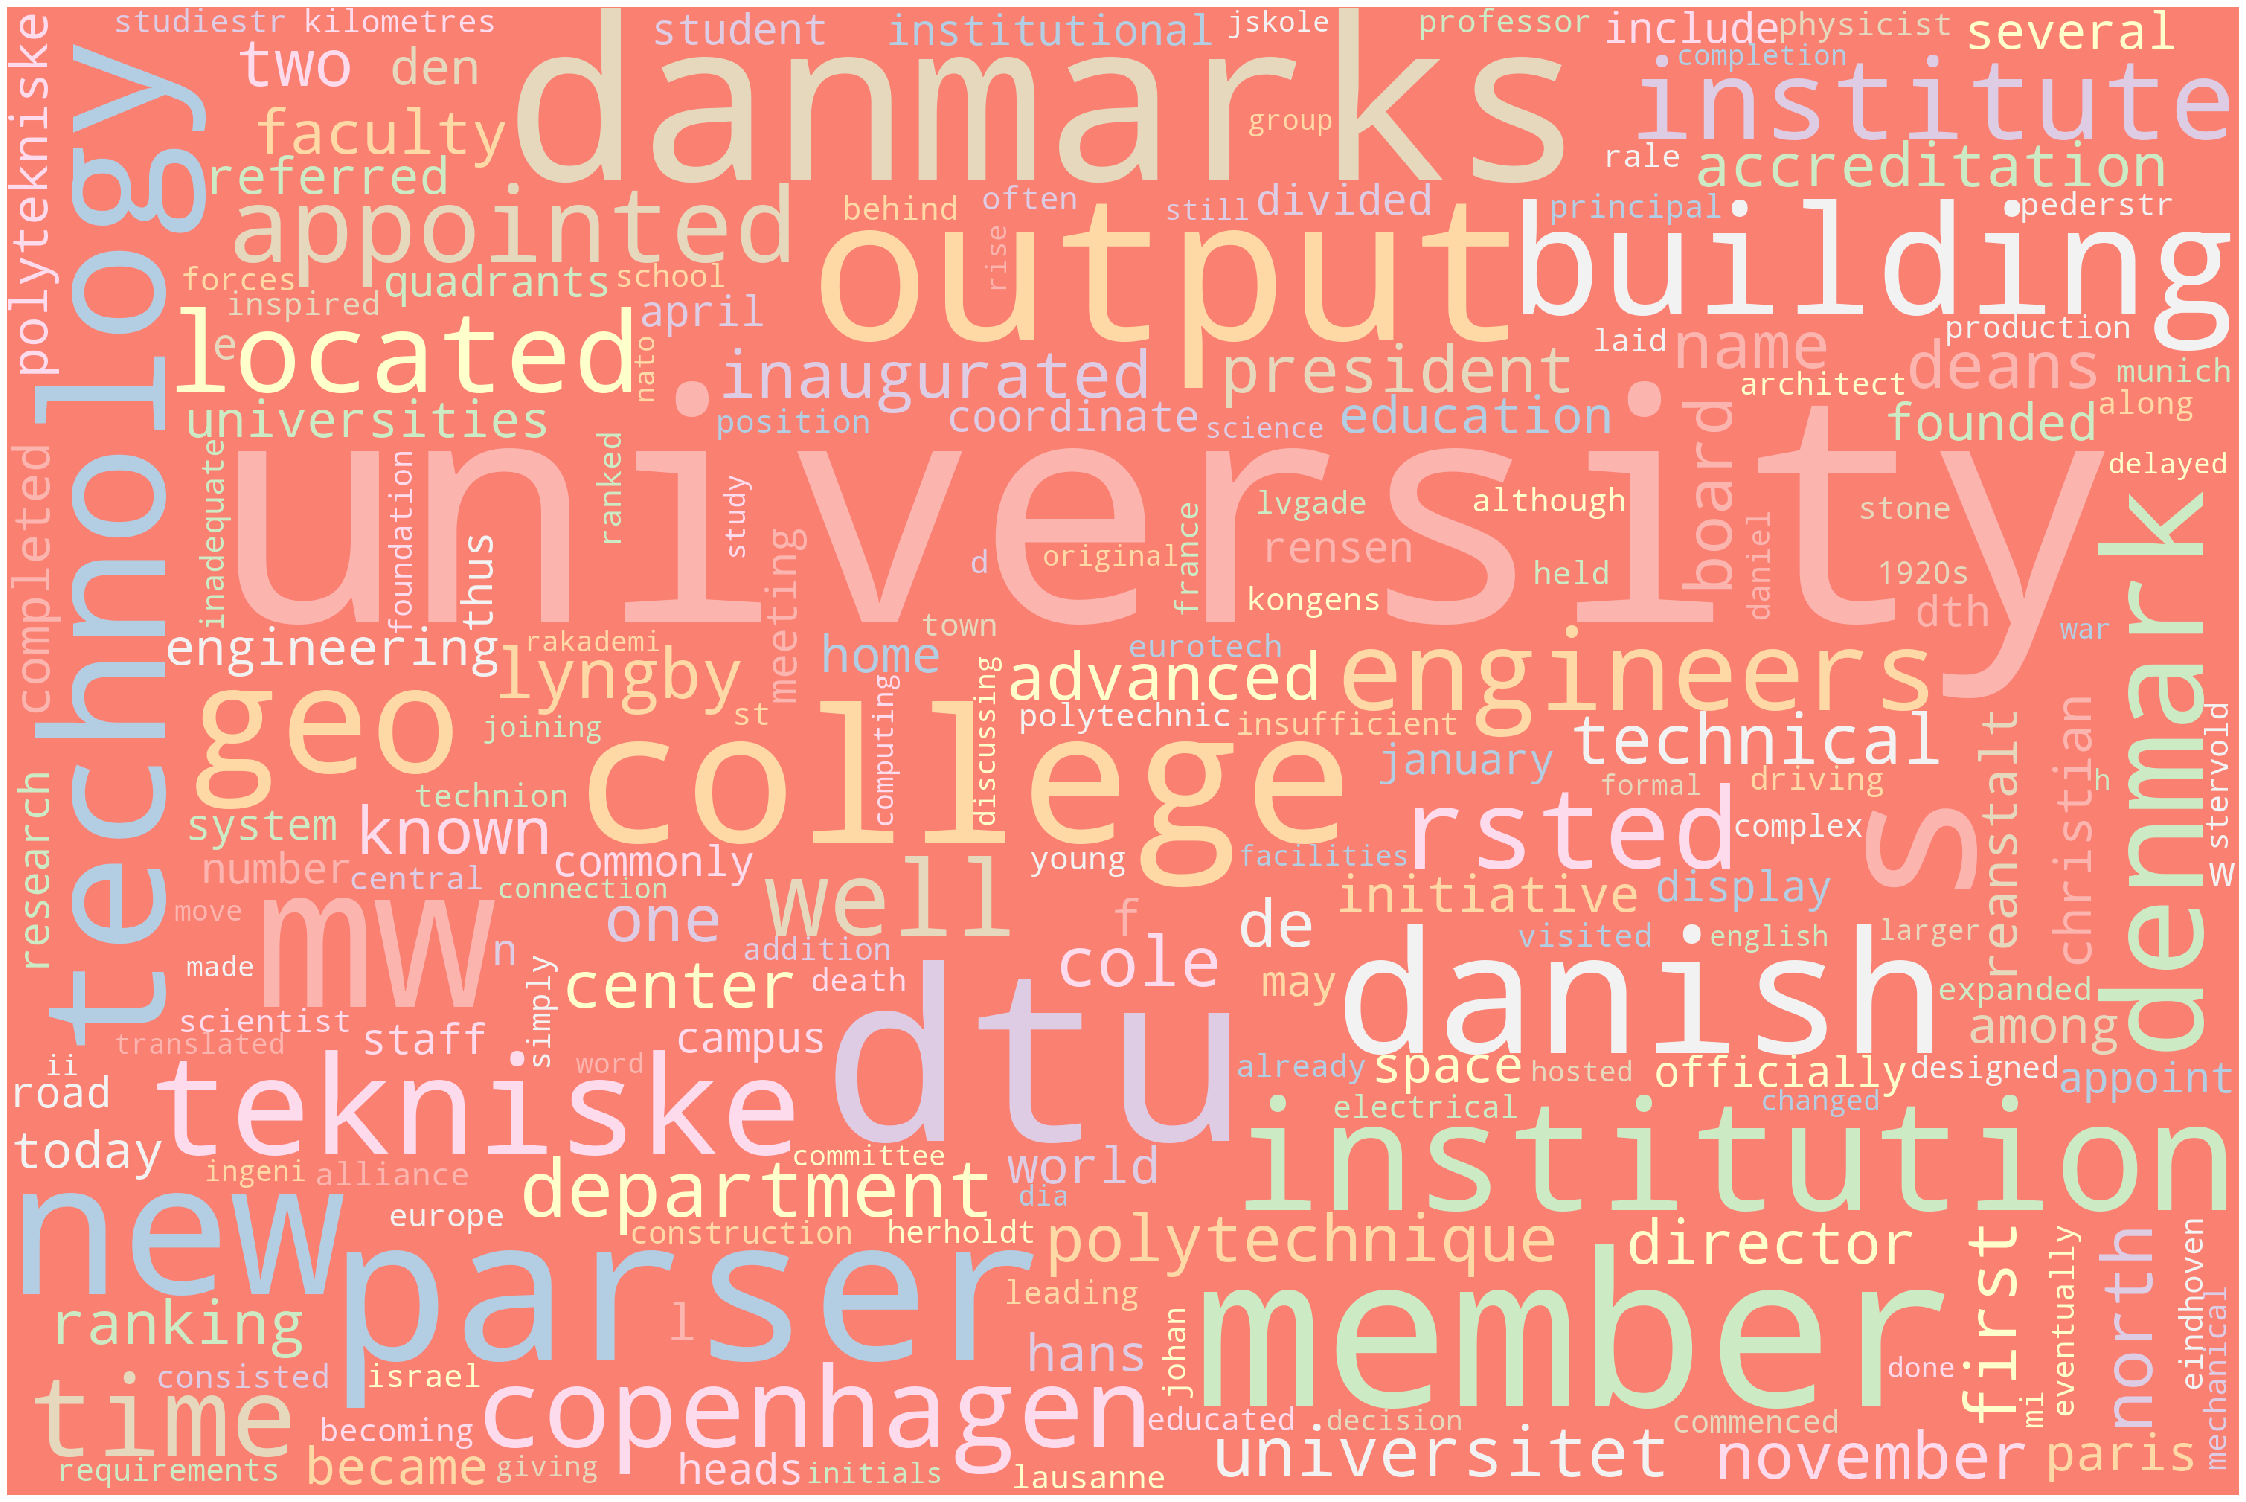

In [5]:
wordCloudData = wc.wordCloudStore(cleanedData)
wc.plot_cloud(wordCloudData.iloc[98,1])

### 5. Sentiment Analysis:

Now that we have created a wordCloud of all the wikipedia pages, lets do sentiment analysis on each wikipedia page. It involves three steps:
<br>
<br>1. Stop word removal. It removes all the stop words present in a sentence which in turn helps in better senitment analysis. we use the stopWordListDel function and pass the cleanedData dataframe to it. It removes all the stopwords present in each row of the dataframe.
<br>
<br>2. Sentiment Score and analysis. After removing the stopwords, we start with the analysis. Each wikipedia page is given a sentiment score according to the content of the page. Negative scores means the page has a overall negative sentiment, while pages with positive sentiment have scores close to 1.0000.
<br>
<br>3. After the analysis, we sort the data. The listSentScore function returns a dataframe which contains the title, the sentiment score and the sentiment compound score of the respective pages. We can then organize and sort the dataframe according to the compound score. This helps in comparing the pages to one another and also to find the top positive and negative pages in the whole list.

Link to WikiSentiAnalysis: https://github.com/gauravshetty98/WikiCrawler/blob/main/WikiSentiAnalysis.ipynb

In [6]:
processedData = wsa.stopWordListDel(cleanedData)
sentimentAnalysisList = wsa.listSentScore(processedData)
wsa.sortAndPrint(sentimentAnalysisList)

#### These are the Top 5 negative Wikipedia topics in the list:

In [10]:
sentimentAnalysisList.head()

,Title,Sentiment Score,Compound Score
253,genocide - wikipedia,"{'neg': 0.223, 'neu': 0.696, 'pos': 0.081, 'co...",-1.0000
152,world war i - wikipedia,"{'neg': 0.217, 'neu': 0.682, 'pos': 0.101, 'co...",-1.0000
267,military history of the united states - wiki...,"{'neg': 0.212, 'neu': 0.668, 'pos': 0.12, 'com...",-1.0000
254,isaaq genocide - wikipedia,"{'neg': 0.191, 'neu': 0.741, 'pos': 0.068, 'co...",-1.0000
4,1989 tiananmen square protests - wikipedia,"{'neg': 0.142, 'neu': 0.751, 'pos': 0.107, 'co...",-0.9999


#### These are the top 5 positive Wikipedia pages in the list:

In [11]:
sentimentAnalysisList.tail()

,Title,Sentiment Score,Compound Score
368,ipad - wikipedia,"{'neg': 0.021, 'neu': 0.878, 'pos': 0.101, 'co...",0.9999
266,supreme court of the united states - wikipedia,"{'neg': 0.06, 'neu': 0.77, 'pos': 0.17, 'compo...",1.0000
144,user talk carl.bunderson - wikipedia,"{'neg': 0.031, 'neu': 0.761, 'pos': 0.208, 'co...",1.0000
263,positive psychology in the workplace - wikip...,"{'neg': 0.054, 'neu': 0.592, 'pos': 0.354, 'co...",1.0000
324,fair trade - wikipedia,"{'neg': 0.055, 'neu': 0.734, 'pos': 0.211, 'co...",1.0000
